<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/5450_Project_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

# Business Impact

# Installing New Libraries

In [1]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.7 MB/s eta 0:00:00


In [2]:
!pip install mplcursors

In [3]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=62a167a2153317ed62bddf784596787603cf0df631562d6028f36c5c6ee2f7d4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [172]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


# Importing Libraries

In [175]:
# imports
import pandas as pd
import copy
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import kagglehub
import itertools
import mplcursors
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost
from catboost import CatBoostRegressor
from sklearn.svm import SVR

# Reading Data from Kaggle

In [5]:
# Download latest version
path = kagglehub.dataset_download("theworldbank/health-nutrition-and-population-statistics")

print("Path to dataset files:", path)

health_df = pd.read_csv(path + '/data.csv')
orig_health_df = copy.deepcopy(health_df)

100%|██████████| 14.0M/14.0M [00:00<00:00, 56.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/theworldbank/health-nutrition-and-population-statistics/versions/1


In [6]:
health_df.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

         1960        1961        1962        1963        1964        1965  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2  133.555013  134.159119  134.857912  134.504576  134.105211  133.569626   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   ...       2007       2008       2009       2010       2011       2012  \
0  ...        NaN        NaN        NaN        NaN        NaN        NaN   
1  ...        NaN        NaN        NaN        NaN        NaN        NaN   
2  ...  49.999851  49.887046  49.781207  49.672975  49.536047  49.383745   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN        NaN        NaN   

        2013       2014  2015  Unnamed: 60  
0        NaN        NaN   NaN          NaN  
1        NaN        NaN   NaN          NaN  
2  48.796558  48.196418   NaN          NaN  
3        NaN        NaN   NaN          NaN  
4        NaN        NaN   NaN          NaN  

[5 rows x 61 columns]

# Helper Functions

In [193]:
def plot_results(df_test_and_predicted, model):
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Actual'], label='True Values') # Access the 'Actual' column data
    plt.plot(df_test_and_predicted['Year'], df_test_and_predicted['Predicted'], label='Predictions', linestyle='dashed') # Access the 'Predicted' column data
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.title(f'{model} Panel Data Prediction')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

In [144]:
def compare_actual_vs_predicted(X_test, y_test, y_pred, model):
    df_actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_actual_vs_predicted['Model'] = model
    df_test_and_predicted = pd.concat([X_test, df_actual_vs_predicted], axis=1)
    return df_test_and_predicted, df_actual_vs_predicted

In [7]:
def plot_kpi(df, x_col, y_col, hue_col):
    title_val = kpi_dict.get(y_col, y_col)
    fig = px.line(df, x=x_col, y=y_col, color=hue_col, title=title_val)
    fig.update_traces(mode="markers+lines", hovertemplate=None)
    fig.update_layout(hovermode="x")
    fig.show()

In [8]:
def show_unique_values(df):
    for e in zip(df.columns, df.dtypes):
        col_name, col_dtype = e
        if col_dtype == 'object':
            unique_values = df[col_name].unique()
            print(f"Unique values for column '{col_name}' are {unique_values}")
            print("---------------------------------------------------------------------")

In [9]:
def show_null_values(df):
    df_len = len(df)
    for col in df.columns:
        total_col_null_values = df[col].isnull().sum()
        pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
        print(f"Column '{col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
        print("---------------------------------------------------------------------")

In [10]:
def show_null_values_per_country(df, ind_col, col, country):
    df_len = len(df)
    total_col_null_values = df[col].isnull().sum()
    pct_null_values = np.round(100 * (total_col_null_values / df_len), 2)
    print(f"For country {country} indicator column '{ind_col}' has {pct_null_values}% null values ({total_col_null_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [11]:
def show_zero_values_per_indicator(df, ind_col):
    df_len = len(df)
    total_col_zero_values = df[ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")
    return pct_zero_values

In [12]:
def show_zero_values_per_ctry_indicator(df, ind_col, ctry):
    df_len = len(df[df['Country Name'] == ctry])
    total_col_zero_values = df[df['Country Name'] == ctry][ind_col].isin([0]).sum()
    pct_zero_values = np.round(100 * (total_col_zero_values / df_len), 2)
    print(f"For country {ctry}, indicator column '{ind_col}' has {pct_zero_values}% zero values ({total_col_zero_values} out of {df_len}).")
    print("---------------------------------------------------------------------")

In [13]:
def impute_data(df, ctry, kpi):
    df = df[df['Country Name'] == ctry][[kpi]]
    df[kpi] = df[kpi].replace(0, np.nan)
    df.ffill(axis = 0, inplace=True)
    return list(itertools.chain(*df.values.tolist()))

# Exploratory Data Analysis

In [14]:
health_df.shape

(89010, 61)

In [15]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

In [16]:
health_df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2012              float64
2013              float64
2014              float64
2015              float64
Unnamed: 60       float64
Length: 61, dtype: object

In [17]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89010 entries, 0 to 89009
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    89010 non-null  object 
 1   Country Code    89010 non-null  object 
 2   Indicator Name  89010 non-null  object 
 3   Indicator Code  89010 non-null  object 
 4   1960            35482 non-null  float64
 5   1961            35325 non-null  float64
 6   1962            35889 non-null  float64
 7   1963            35452 non-null  float64
 8   1964            35483 non-null  float64
 9   1965            35603 non-null  float64
 10  1966            35538 non-null  float64
 11  1967            36022 non-null  float64
 12  1968            35577 non-null  float64
 13  1969            35630 non-null  float64
 14  1970            36910 non-null  float64
 15  1971            37578 non-null  float64
 16  1972            38015 non-null  float64
 17  1973            37542 non-null 

In [18]:
ind_name_list = list(health_df['Indicator Name'].unique())
len(ind_name_list)

345

In [19]:
health_df.groupby(['Country Name']).agg({'Indicator Name' : np.size}).sort_values(by='Indicator Name', ascending=False)

Indicator Name
Country Name                                  
Zimbabwe                                   345
Afghanistan                                345
St. Martin (French part)                   345
St. Vincent and the Grenadines             345
Sub-Saharan Africa                         345
...                                        ...
Angola                                     345
Antigua and Barbuda                        345
Arab World                                 345
Argentina                                  345
Armenia                                    345

[258 rows x 1 columns]

In [20]:
health_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Unnamed: 60'],
      dtype='object')

# Data Processing

In [21]:
kpi_dict = dict(zip(health_df['Indicator Code'], health_df['Indicator Name']))

In [22]:
year_cols = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015']

In [23]:
# Droppinmg unnamed columns
health_df.drop(columns=['Unnamed: 60'], inplace=True)
# replacing NaN with 0
for col in year_cols:
       health_df[col] = health_df[col].fillna(0)

In [24]:
'''
The data set contains both countries and conglomereate of multiple countries.
We are just extracing countries.
'''
country_name_list = ['Afghanistan',
                     'Albania',
                     'Algeria',
                     'American Samoa',
                     'Andorra',
                     'Angola',
                     'Antigua and Barbuda',
                     'Argentina',
                     'Armenia',
                     'Aruba',
                     'Australia',
                     'Austria',
                     'Azerbaijan',
                     'Bahamas, The',
                     'Bahrain',
                     'Bangladesh',
                     'Barbados',
                     'Belarus',
                     'Belgium',
                     'Belize',
                     'Benin',
                     'Bermuda',
                     'Bhutan',
                     'Bolivia',
                     'Bosnia and Herzegovina',
                     'Botswana',
                     'Brazil',
                     'British Virgin Islands',
                     'Brunei Darussalam',
                     'Bulgaria',
                     'Burkina Faso',
                     'Burundi',
                     'Cabo Verde',
                     'Cambodia',
                     'Cameroon',
                     'Canada',
                     'Cayman Islands',
                     'Central African Republic',
                     'Chad',
                     'Channel Islands',
                     'Chile',
                     'China',
                     'Colombia',
                     'Comoros',
                     'Congo, Dem. Rep.',
                     'Congo, Rep.',
                     'Costa Rica',
                     "Cote d'Ivoire",
                     'Croatia',
                     'Cuba',
                     'Curacao',
                     'Cyprus',
                     'Czech Republic',
                     'Denmark',
                     'Djibouti',
                     'Dominica',
                     'Dominican Republic',
                     'Ecuador',
                     'Egypt, Arab Rep.',
                     'El Salvador',
                     'Equatorial Guinea',
                     'Eritrea',
                     'Estonia',
                     'Ethiopia',
                     'Faroe Islands',
                     'Fiji',
                     'Finland',
                     'France',
                     'French Polynesia',
                     'Gabon',
                     'Gambia, The',
                     'Georgia',
                     'Germany',
                     'Ghana',
                     'Gibraltar',
                     'Greece',
                     'Greenland',
                     'Grenada',
                     'Guam',
                     'Guatemala',
                     'Guinea',
                     'Guinea-Bissau',
                     'Guyana',
                     'Haiti',
                     'Honduras',
                     'Hong Kong SAR, China',
                     'Hungary',
                     'Iceland',
                     'India',
                     'Indonesia',
                     'Iran, Islamic Rep.',
                     'Iraq',
                     'Ireland',
                     'Isle of Man',
                     'Israel',
                     'Italy',
                     'Jamaica',
                     'Japan',
                     'Jordan',
                     'Kazakhstan',
                     'Kenya',
                     'Kiribati',
                     'Korea, Dem. People’s Rep.',
                     'Korea, Rep.',
                     'Kosovo',
                     'Kuwait',
                     'Kyrgyz Republic',
                     'Lao PDR',
                     'Latvia',
                     'Lebanon',
                     'Lesotho',
                     'Liberia',
                     'Libya',
                     'Liechtenstein',
                     'Lithuania',
                     'Luxembourg',
                     'Macao SAR, China',
                     'Macedonia, FYR',
                     'Madagascar',
                     'Malawi',
                     'Malaysia',
                     'Maldives',
                     'Mali',
                     'Malta',
                     'Marshall Islands',
                     'Mauritania',
                     'Mauritius',
                     'Mexico',
                     'Micronesia, Fed. Sts.',
                     'Moldova',
                     'Monaco',
                     'Mongolia',
                     'Montenegro',
                     'Morocco',
                     'Mozambique',
                     'Myanmar',
                     'Namibia',
                     'Nauru',
                     'Nepal',
                     'Netherlands',
                     'New Caledonia',
                     'New Zealand',
                     'Nicaragua',
                     'Niger',
                     'Nigeria',
                     'Northern Mariana Islands',
                     'Norway',
                     'Oman',
                     'Pakistan',
                     'Palau',
                     'Panama',
                     'Papua New Guinea',
                     'Paraguay',
                     'Peru',
                     'Philippines',
                     'Poland',
                     'Portugal',
                     'Puerto Rico',
                     'Qatar',
                     'Romania',
                     'Russian Federation',
                     'Rwanda',
                     'Samoa',
                     'San Marino',
                     'Sao Tome and Principe',
                     'Saudi Arabia',
                     'Senegal',
                     'Serbia',
                     'Seychelles',
                     'Sierra Leone',
                     'Singapore',
                     'Sint Maarten (Dutch part)',
                     'Slovak Republic',
                     'Slovenia',
                     'Solomon Islands',
                     'Somalia',
                     'South Africa',
                     'South Sudan',
                     'Spain',
                     'Sri Lanka',
                     'St. Kitts and Nevis',
                     'St. Lucia',
                     'St. Martin (French part)',
                     'St. Vincent and the Grenadines',
                     'Sudan',
                     'Suriname',
                     'Swaziland',
                     'Sweden',
                     'Switzerland',
                     'Syrian Arab Republic',
                     'Tajikistan',
                     'Tanzania',
                     'Thailand',
                     'Timor-Leste',
                     'Togo',
                     'Tonga',
                     'Trinidad and Tobago',
                     'Tunisia',
                     'Turkey',
                     'Turkmenistan',
                     'Turks and Caicos Islands',
                     'Tuvalu',
                     'Uganda',
                     'Ukraine',
                     'United Arab Emirates',
                     'United Kingdom',
                     'United States',
                     'Uruguay',
                     'Uzbekistan',
                     'Vanuatu',
                     'Venezuela, RB',
                     'Vietnam',
                     'Virgin Islands (U.S.)',
                     'West Bank and Gaza',
                     'Yemen, Rep.',
                     'Zambia',
                     'Zimbabwe'
                     ]

In [25]:
country_year_health_df = health_df[health_df['Country Name'].isin(country_name_list)].reset_index(drop=True)
country_year_health_df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

      1960     1961     1962     1963     1964     1965  ...       2006  \
0    0.000    0.000    0.000    0.000    0.000    0.000  ...     0.0000   
1    0.000    0.000    0.000    0.000    0.000    0.000  ...     0.0000   
2  145.321  145.321  145.321  145.321  145.321  145.321  ...   123.1616   
3    0.000    0.000    0.000    0.000    0.000    0.000  ...  3300.0000   
4    0.000    0.000    0.000    0.000    0.000    0.000  ...   500.0000   

      2007       2008       2009       2010       2011      2012       2013  \
0     0.00     0.0000     0.0000     0.0000     1.5000     0.000     0.0000   
1     0.00     0.0000     0.0000     0.0000     0.0000     0.000     0.0000   
2   117.39   111.4708   105.5516    99.6324    93.7132    87.794    82.2638   
3  3500.00  3800.0000  4200.0000  4500.0000  4900.0000  5300.000  5900.0000   
4  1000.00  1000.0000  1000.0000  1000.0000  1000.0000  1000.000  1000.0000   

        2014    2015  
0     0.0000     0.0  
1     0.0000     0.0  
2    76.7336     0.0  
3  6400.0000  6900.0  
4  1000.0000  1000.0  

[5 rows x 60 columns]

In [110]:
#health_df_1 = country_year_health_df.set_index(['Country Name', 'Indicator Code'])[year_cols].unstack()
#health_df_1

In [26]:
'''
Formatting the dataframe structure.
In the original dataframe, the data is laid out for each country-kpi, data is
present in each row across the years.
In the new format, we are placing all the kpis for a country in a single row.
There will be multiple rows for each country pertaining to each year
ranging from 1960 thru 2015.
'''
comb_list = [list(country_year_health_df['Country Name'].unique())] + [year_cols]
result = list(itertools.product(*comb_list))
df_x = pd.DataFrame(result, columns=['Country Name', 'Year'])
for col in country_year_health_df['Indicator Code'].unique():
    df_x[col] = 0
df_x.set_index(['Country Name', 'Year'], inplace=True)
df_x.reset_index(inplace=True)
col_list = list(df_x.columns)

# Create an empty list to store the DataFrames
all_dfs = []
for ctry in country_year_health_df['Country Name'].unique():
    temp_df = country_year_health_df[country_year_health_df['Country Name'] == ctry].iloc[:, 3:].T
    series_names = temp_df.iloc[0, :]
    temp_df = temp_df.iloc[1:, :]
    temp_df.columns = series_names
    temp_df['Country Name'] = ctry
    temp_df.reset_index(inplace=True)
    temp_df.rename(columns={'index' : 'Year'}, inplace=True)
    temp_df = temp_df[col_list]

    # Append the temp_df to the list instead of using append
    all_dfs.append(temp_df)

# Concatenate all DataFrames in the list outside the loop
df_x = pd.concat(all_dfs, ignore_index=True)

<ipython-input-26-2a04cf72dd28>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-26-2a04cf72dd28>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-input-26-2a04cf72dd28>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_x[col] = 0
<ipython-inpu

In [27]:
df_x.head(50)

Indicator Code Country Name  Year SH.HIV.KNOW.FE.ZS SH.HIV.KNOW.MA.ZS  \
0               Afghanistan  1960               0.0               0.0   
1               Afghanistan  1961               0.0               0.0   
2               Afghanistan  1962               0.0               0.0   
3               Afghanistan  1963               0.0               0.0   
4               Afghanistan  1964               0.0               0.0   
5               Afghanistan  1965               0.0               0.0   
6               Afghanistan  1966               0.0               0.0   
7               Afghanistan  1967               0.0               0.0   
8               Afghanistan  1968               0.0               0.0   
9               Afghanistan  1969               0.0               0.0   
10              Afghanistan  1970               0.0               0.0   
11              Afghanistan  1971               0.0               0.0   
12              Afghanistan  1972               0.0               0.0   
13              Afghanistan  1973               0.0               0.0   
14              Afghanistan  1974               0.0               0.0   
15              Afghanistan  1975               0.0               0.0   
16              Afghanistan  1976               0.0               0.0   
17              Afghanistan  1977               0.0               0.0   
18              Afghanistan  1978               0.0               0.0   
19              Afghanistan  1979               0.0               0.0   
20              Afghanistan  1980               0.0               0.0   
21              Afghanistan  1981               0.0               0.0   
22              Afghanistan  1982               0.0               0.0   
23              Afghanistan  1983               0.0               0.0   
24              Afghanistan  1984               0.0               0.0   
25              Afghanistan  1985               0.0               0.0   
26              Afghanistan  1986               0.0               0.0   
27              Afghanistan  1987               0.0               0.0   
28              Afghanistan  1988               0.0               0.0   
29              Afghanistan  1989               0.0               0.0   
30              Afghanistan  1990               0.0               0.0   
31              Afghanistan  1991               0.0               0.0   
32              Afghanistan  1992               0.0               0.0   
33              Afghanistan  1993               0.0               0.0   
34              Afghanistan  1994               0.0               0.0   
35              Afghanistan  1995               0.0               0.0   
36              Afghanistan  1996               0.0               0.0   
37              Afghanistan  1997               0.0               0.0   
38              Afghanistan  1998               0.0               0.0   
39              Afghanistan  1999               0.0               0.0   
40              Afghanistan  2000               0.0               0.0   
41              Afghanistan  2001               0.0               0.0   
42              Afghanistan  2002               0.0               0.0   
43              Afghanistan  2003               0.0               0.0   
44              Afghanistan  2004               0.0               0.0   
45              Afghanistan  2005               0.0               0.0   
46              Afghanistan  2006               0.0               0.0   
47              Afghanistan  2007               0.0               0.0   
48              Afghanistan  2008               0.0               0.0   
49              Afghanistan  2009               0.0               0.0   

Indicator Code SP.ADO.TFRT SH.HIV.TOTL SH.HIV.INCD.TL SH.DYN.AIDS SH.HIV.INCD  \
0                  145.321         0.0            0.0         0.0         0.0   
1                  145.321         0.0            0.0         0.0         0.0   
2                  145.321       

In [28]:
df_x.shape

(12152, 347)

In [29]:
series_names = df_x.columns[2:]

In [30]:
# Checking % of data populated per country.
for series in series_names:
    print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.HIV.KNOW.FE.ZS Indicator Code        SH.HIV.KNOW.FE.ZS
Country Name                           
Afghanistan                         1.5
Albania                            34.0
Algeria                            21.4
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 15.6
Yemen, Rep.                         1.3
Zambia                            113.4
Zimbabwe                          217.8

[217 rows x 1 columns]
SH.HIV.KNOW.MA.ZS Indicator Code        SH.HIV.KNOW.MA.ZS
Country Name                           
Afghanistan                         0.0
Albania                            20.3
Algeria                             0.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.POP.AG04.MA.IN
Country Name                           
Afghanistan                  16131255.0
Albania                       1685683.0
Algeria                      18180727.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           52092.0
West Bank and Gaza            1449406.0
Yemen, Rep.                  12324463.0
Zambia                        7873726.0
Zimbabwe                      8415785.0

[217 rows x 1 columns]
SP.POP.AG05.FE.IN Indicator Code        SP.POP.AG05.FE.IN
Country Name                           
Afghanistan                  14773774.0
Albania                       1586372.0
Algeria                      17120469.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           49508.0
West Bank and Gaza            1354689.0
Yemen, Rep.                  11525961.

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

 Indicator Code        SP.POP.AG08.MA.IN
Country Name                           
Afghanistan                  13919157.0
Albania                       1678145.0
Algeria                      16919306.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48912.0
West Bank and Gaza            1306599.0
Yemen, Rep.                  10838818.0
Zambia                        6753717.0
Zimbabwe                      7565493.0

[217 rows x 1 columns]
SP.POP.AG09.FE.IN Indicator Code        SP.POP.AG09.FE.IN
Country Name                           
Afghanistan                  12719534.0
Albania                       1584682.0
Algeria                      15997866.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           48405.0
West Bank and Gaza            1221406.0
Yemen, Rep.                  10187564

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SP.POP.AG13.FE.IN Indicator Code        SP.POP.AG13.FE.IN
Country Name                           
Afghanistan                  11001184.0
Albania                       1557443.0
Algeria                      15155917.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           47872.0
West Bank and Gaza            1096178.0
Yemen, Rep.                   9050715.0
Zambia                        5645019.0
Zimbabwe                      6652709.0

[217 rows x 1 columns]
SP.POP.AG13.MA.IN Indicator Code        SP.POP.AG13.MA.IN
Country Name                           
Afghanistan                  11633832.0
Albania                       1637514.0
Algeria                      15796401.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           47738.0
West Bank and Gaza            1140139.0
Yemen, Rep.        

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.AG20.MA.IN Indicator Code        SP.POP.AG20.MA.IN
Country Name                           
Afghanistan                   8935673.0
Albania                       1427995.0
Algeria                      14069577.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           37337.0
West Bank and Gaza             897213.0
Yemen, Rep.                   7302544.0
Zambia                        4454792.0
Zimbabwe                      5474390.0

[217 rows x 1 columns]
SP.POP.AG21.FE.IN Indicator Code        SP.POP.AG21.FE.IN
Country Name                           
Afghanistan                   8051863.0
Albania                       1340719.0
Algeria                      13295987.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)           38449.0
West Bank and Gaza             834073.0
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.DTH.INJR.ZS Indicator Code        SH.DTH.INJR.ZS
Country Name                        
Afghanistan                     30.5
Albania                         13.9
Algeria                         19.2
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     18.8
Zambia                          18.7
Zimbabwe                        11.9

[217 rows x 1 columns]
SH.DTH.NCOM.ZS Indicator Code        SH.DTH.NCOM.ZS
Country Name                        
Afghanistan                     63.0
Albania                        172.5
Algeria                        146.8
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     70.3
Zambia                          37.5
Zimbabwe             

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.DYN.CONM.ZS Indicator Code        SP.DYN.CONM.ZS
Country Name                        
Afghanistan                     91.3
Albania                         56.3
Algeria                        294.5
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)           72.6
West Bank and Gaza             185.0
Yemen, Rep.                     77.7
Zambia                         158.1
Zimbabwe                       310.7

[217 rows x 1 columns]
SP.DYN.CDRT.IN Indicator Code        SP.DYN.CDRT.IN
Country Name                        
Afghanistan                 1037.345
Albania                      382.656
Algeria                      550.264
American Samoa                   4.0
Andorra                         26.2
...                              ...
Virgin Islands (U.S.)         342.57
West Bank and Gaza           114.535
Yemen, Rep.                  861.534
Zambia                       894.183
Zimbabwe             

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.4549.FE Indicator Code        SP.POP.4549.FE
Country Name                        
Afghanistan               14619170.0
Albania                    3718491.0
Algeria                   26454454.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       159041.0
West Bank and Gaza         1289381.0
Yemen, Rep.               12093097.0
Zambia                     6710709.0
Zimbabwe                   7647418.0

[217 rows x 1 columns]
SP.POP.5054.FE Indicator Code        SP.POP.5054.FE
Country Name                        
Afghanistan               11826523.0
Albania                    3256681.0
Algeria                   21743743.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       144610.0
West Bank and Gaza         1004431.0
Yemen, Rep.               10001841.0
Zambia                     5615604.0
Zimbabwe             

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.IMM.IDPT Indicator Code        SH.IMM.IDPT
Country Name                     
Afghanistan                1298.0
Albania                    3467.0
Algeria                    2737.0
American Samoa                0.0
Andorra                    1830.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                1842.0
Zambia                     2680.0
Zimbabwe                   2720.0

[217 rows x 1 columns]
SH.IMM.HEPB Indicator Code        SH.IMM.HEPB
Country Name                     
Afghanistan                 614.0
Albania                    1567.0
Algeria                    1089.0
American Samoa                0.0
Andorra                    1430.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                 951.0
Zambia                      921.0
Zimbabwe                   1273.0

[217 rows x 1 columns]
SH.IMM.HIB3 Indicator Code        SH.IMM.HIB

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.DYN.LE00.MA.IN
Country Name                           
Afghanistan                    2527.431
Albania                        3795.073
Algeria                        3336.472
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          3849.694
West Bank and Gaza             1728.209
Yemen, Rep.                    2809.302
Zambia                         2592.729
Zimbabwe                       2857.545

[217 rows x 1 columns]
SP.DYN.LE00.IN Indicator Code        SP.DYN.LE00.IN
Country Name                        
Afghanistan              2577.927585
Albania                  3918.571049
Algeria                  3412.900293
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)    4020.706683
West Bank and Gaza       1770.969488
Yemen, Rep.              2883.976146
Zambia                   2670.7221

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.MALR Indicator Code        SH.STA.MALR
Country Name                     
Afghanistan             5201971.0
Albania                       0.0
Algeria                    2626.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.             7527620.0
Zambia                 32647577.0
Zimbabwe               15013624.0

[217 rows x 1 columns]
SP.POP.0004.MA Indicator Code        SP.POP.0004.MA
Country Name                        
Afghanistan               86963559.0
Albania                    8444607.0
Algeria                   95046561.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)       285358.0
West Bank and Gaza         7115221.0
Yemen, Rep.               66043297.0
Zambia                    42790788.0
Zimbabwe                  44658571.0

[217 rows x 1 columns]
SP

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.7579.MA Indicator Code        SP.POP.7579.MA
Country Name                        
Afghanistan                1650007.0
Albania                     895427.0
Algeria                    4950417.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        28846.0
West Bank and Gaza          148709.0
Yemen, Rep.                1612544.0
Zambia                      943016.0
Zimbabwe                   1330424.0

[217 rows x 1 columns]
SP.POP.80UP.MA Indicator Code        SP.POP.80UP.MA
Country Name                        
Afghanistan                 925780.0
Albania                     693012.0
Algeria                    3728372.0
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)        24440.0
West Bank and Gaza           95328.0
Yemen, Rep.                1204557.0
Zambia                      621233.0
Zimbabwe             

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.DYN.IMRT.IN Indicator Code        SP.DYN.IMRT.IN
Country Name                        
Afghanistan                   7733.7
Albania                       1195.6
Algeria                       4232.3
American Samoa                   0.0
Andorra                        101.2
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza            1464.7
Yemen, Rep.                   6340.3
Zambia                        5307.9
Zimbabwe                      3584.9

[217 rows x 1 columns]
SP.DYN.IMRT.FE.IN Indicator Code        SP.DYN.IMRT.FE.IN
Country Name                           
Afghanistan                       338.3
Albania                            76.6
Algeria                           109.6
American Samoa                      0.0
Andorra                            14.3
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                 91.8
Yemen, Rep.                       213.7
Zambia                

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.DTH.NMRT Indicator Code        SH.DTH.NMRT
Country Name                     
Afghanistan             1032070.0
Albania                   14150.0
Algeria                  378096.0
American Samoa                0.0
Andorra                      37.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza        50554.0
Yemen, Rep.              626144.0
Zambia                   366005.0
Zimbabwe                 257075.0

[217 rows x 1 columns]
SN.ITK.DEFC Indicator Code         SN.ITK.DEFC
Country Name                      
Afghanistan            198900000.0
Albania                        0.0
Algeria                 47400000.0
American Samoa                 0.0
Andorra                        0.0
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza             0.0
Yemen, Rep.            135700000.0
Zambia                 127500000.0
Zimbabwe               127300000.0

[217 rows x 1 columns]
SH.SGR.PROC.P5 Indicator Code  

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.0014.FE.IN Indicator Code        SP.POP.0014.FE.IN
Country Name                           
Afghanistan                 208724719.0
Albania                      23621543.0
Algeria                     250796215.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          759119.0
West Bank and Gaza           18076990.0
Yemen, Rep.                 164627233.0
Zambia                      106272854.0
Zimbabwe                    116992957.0

[217 rows x 1 columns]
SP.POP.0014.MA.IN Indicator Code        SP.POP.0014.MA.IN
Country Name                           
Afghanistan                 219623592.0
Albania                      25008773.0
Algeria                     261161651.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          774524.0
West Bank and Gaza           18841466.0
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.1564.FE.ZS Indicator Code        SP.POP.1564.FE.ZS
Country Name                           
Afghanistan                 2865.071538
Albania                     3357.598318
Algeria                     3137.095108
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)       3467.664262
West Bank and Gaza          1348.961933
Yemen, Rep.                 2858.326299
Zambia                      2826.931438
Zimbabwe                    2879.550988

[217 rows x 1 columns]
SP.POP.1564.MA.IN Indicator Code        SP.POP.1564.MA.IN
Country Name                           
Afghanistan                 242396245.0
Albania                      46796065.0
Algeria                     396466354.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         1520246.0
West Bank and Gaza           21689386.0
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.3539.FE.5Y Indicator Code        SP.POP.3539.FE.5Y
Country Name                           
Afghanistan                   278.42528
Albania                      337.916492
Algeria                      304.667383
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        377.610382
West Bank and Gaza           128.489635
Yemen, Rep.                  266.912162
Zambia                       261.752605
Zimbabwe                     260.132946

[217 rows x 1 columns]
SP.POP.3539.MA.5Y Indicator Code        SP.POP.3539.MA.5Y
Country Name                           
Afghanistan                  285.502617
Albania                      335.350341
Algeria                      300.626101
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        362.671709
West Bank and Gaza            126.25742
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co


SP.POP.5054.MA.5Y Indicator Code        SP.POP.5054.MA.5Y
Country Name                           
Afghanistan                  149.273585
Albania                       248.89915
Algeria                      166.309316
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        289.481425
West Bank and Gaza            63.795299
Yemen, Rep.                  142.555319
Zambia                       132.894541
Zimbabwe                     133.062802

[217 rows x 1 columns]
SP.POP.5559.FE.5Y Indicator Code        SP.POP.5559.FE.5Y
Country Name                           
Afghanistan                  119.597175
Albania                      203.380476
Algeria                      145.847965
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        248.840817
West Bank and Gaza            49.993293
Yemen, Rep.        

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.65UP.TO.ZS Indicator Code        SP.POP.65UP.TO.ZS
Country Name                           
Afghanistan                  135.301764
Albania                      378.140032
Algeria                        224.6405
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         406.45605
West Bank and Gaza            63.408158
Yemen, Rep.                   160.19609
Zambia                       151.694819
Zimbabwe                     175.782856

[217 rows x 1 columns]
SP.POP.65UP.FE.IN Indicator Code        SP.POP.65UP.FE.IN
Country Name                           
Afghanistan                  11195615.0
Albania                       5543022.0
Algeria                      30468661.0
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)          218278.0
West Bank and Gaza            1105187.0
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SP.POP.80UP.MA.5Y Indicator Code        SP.POP.80UP.MA.5Y
Country Name                           
Afghanistan                   10.853312
Albania                       50.367154
Algeria                       26.357942
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)         52.687122
West Bank and Gaza             5.877781
Yemen, Rep.                   17.404088
Zambia                        14.496245
Zimbabwe                      20.526904

[217 rows x 1 columns]
SP.POP.1014.MA.5Y Indicator Code        SP.POP.1014.MA.5Y
Country Name                           
Afghanistan                  702.643174
Albania                       603.15462
Algeria                      677.388073
American Samoa                      0.0
Andorra                             0.0
...                                 ...
Virgin Islands (U.S.)        552.423355
West Bank and Gaza           343.440088
Yemen, Rep.         

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.ANVC.ZS Indicator Code        SH.STA.ANVC.ZS
Country Name                        
Afghanistan                    226.8
Albania                        380.3
Algeria                        399.8
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             391.8
Yemen, Rep.                    208.3
Zambia                         553.9
Zimbabwe                       731.7

[217 rows x 1 columns]
SH.STA.ANV4.ZS Indicator Code        SH.STA.ANV4.ZS
Country Name                        
Afghanistan                     30.7
Albania                        149.0
Algeria                        134.8
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza             189.5
Yemen, Rep.                     75.2
Zambia                         467.0
Zimbabwe             

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SH.STA.OW15.ZS Indicator Code        SH.STA.OW15.ZS
Country Name                        
Afghanistan                     30.6
Albania                        103.2
Algeria                        115.5
American Samoa                   0.0
Andorra                        132.1
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                     91.6
Zambia                          55.6
Zimbabwe                        59.9

[217 rows x 1 columns]
SH.STA.OWGH.ZS Indicator Code        SH.STA.OWGH.ZS
Country Name                        
Afghanistan                     11.1
Albania                         88.1
Algeria                    76.599998
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza              28.9
Yemen, Rep.                27.700001
Zambia                     43.699999
Zimbabwe             

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

SE.XPD.TOTL.GD.ZS Indicator Code        SE.XPD.TOTL.GD.ZS
Country Name                           
Afghanistan                    33.30203
Albania                        49.60673
Algeria                        18.11645
American Samoa                      0.0
Andorra                        30.66108
...                                 ...
Virgin Islands (U.S.)               0.0
West Bank and Gaza                  0.0
Yemen, Rep.                   23.466939
Zambia                        110.08179
Zimbabwe                     142.919861

[217 rows x 1 columns]
SE.ENR.ORPH Indicator Code        SE.ENR.ORPH
Country Name                     
Afghanistan                   0.0
Albania                       0.0
Algeria                       0.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza            0.0
Yemen, Rep.                   0.0
Zambia                       8.34
Zimbabwe          

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SE.PRM.NENR.MA
Country Name                        
Afghanistan                86.541237
Albania                  1031.748589
Algeria                   3165.69326
American Samoa                   0.0
Andorra                          0.0
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza       1367.944092
Yemen, Rep.               676.559731
Zambia                   2235.772667
Zimbabwe                  669.467155

[217 rows x 1 columns]
SE.SEC.ENRR Indicator Code         SE.SEC.ENRR
Country Name                      
Afghanistan             789.925303
Albania                3117.054924
Algeria                2079.166677
American Samoa                 0.0
Andorra                 170.715113
...                            ...
Virgin Islands (U.S.)          0.0
West Bank and Gaza     1566.580704
Yemen, Rep.             453.269665
Zambia                  309.707088
Zimbabwe               1058.006917

[217 rows x 1 columns]
SE.S

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

 Indicator Code        SH.PRV.SMOK.MA
Country Name                        
Afghanistan                      0.0
Albania                        216.8
Algeria                          0.0
American Samoa                   0.0
Andorra                        162.6
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                      0.0
Zambia                         115.4
Zimbabwe                       129.3

[217 rows x 1 columns]
SH.MED.SAOP.P5 Indicator Code        SH.MED.SAOP.P5
Country Name                        
Afghanistan                 0.028169
Albania                     7.071747
Algeria                    12.119625
American Samoa                   0.0
Andorra                    60.273973
...                              ...
Virgin Islands (U.S.)            0.0
West Bank and Gaza               0.0
Yemen, Rep.                 0.809655
Zambia                      1.107955
Zimbabwe                    1.30830

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

Indicator Code        SP.URB.GROW
Country Name                     
Afghanistan            251.603326
Albania                126.513583
Algeria                216.732134
American Samoa          131.69409
Andorra                213.975779
...                           ...
Virgin Islands (U.S.)  172.791238
West Bank and Gaza      91.003613
Yemen, Rep.            304.383139
Zambia                 255.754712
Zimbabwe               241.711837

[217 rows x 1 columns]
SI.POV.URHC Indicator Code        SI.POV.URHC
Country Name                     
Afghanistan                  56.5
Albania                      54.4
Algeria                       0.0
American Samoa                0.0
Andorra                       0.0
...                           ...
Virgin Islands (U.S.)         0.0
West Bank and Gaza          164.3
Yemen, Rep.                  20.7
Zambia                       27.5
Zimbabwe                     46.5

[217 rows x 1 columns]
SH.MLR.PREG.ZS Indicator Code        SH.MLR.PREG.ZS
Coun

<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Country Name']).agg({series : np.sum}))
<ipython-input-30-894550dfc28e>:3: FutureWarning: The provided callable <function sum at 0x7af157a10670> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(series, df_x.groupby(['Co

In [31]:
# Checking % of zero values per country-kpi level.
for ctry in country_year_health_df['Country Name'].unique():
    for series in series_names:
        show_zero_values_per_ctry_indicator(df_x, series, ctry)

Streaming output truncated to the last 5000 lines.
For country Vanuatu, indicator column 'SP.POP.80UP.MA.5Y' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.1014.MA.5Y' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.GROW' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.FE.IN' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.FE.ZS' has 0.0% zero values (0 out of 56).
---------------------------------------------------------------------
For country Vanuatu, indicator column 'SP.POP.TOTL.MA.IN' has 0.0% zero values (0 out of 56).
-----------------------------------------

In [32]:
# Checking % of zero values at kpi level across all countries.
for series in series_names:
    show_zero_values_per_indicator(df_x, series)

For indicator column 'SH.HIV.KNOW.FE.ZS' has 97.82% zero values (11887 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.KNOW.MA.ZS' has 98.8% zero values (12006 out of 12152).
---------------------------------------------------------------------
For indicator column 'SP.ADO.TFRT' has 12.2% zero values (1482 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.TOTL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD.TL' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.DYN.AIDS' has 77.11% zero values (9370 out of 12152).
---------------------------------------------------------------------
For indicator column 'SH.HIV.INCD' has 77.11% zero values (9370 out of 12152).
------------

In [33]:
list(range(int(min(year_cols)), int(max(year_cols)), 5))

[1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]

In [34]:
# Checking % of zero values for each kpi across countries with different year cut off.
# The reason for using year cut off is that not alway the kpi values are populated from certain years.
# This % values will help us to use the ones that have zero values under certain threshold.
kpi_matrix = []
for series in series_names:
    for year in list(range(int(min(year_cols)), int(max(year_cols)), 5)):
        print(f"Cut off year {year}")
        pct_zero_values = show_zero_values_per_indicator(df_x[df_x['Year'] >= str(year)], series)
        kpi_matrix.append([year, series, pct_zero_values])
df_kpi = pd.DataFrame(kpi_matrix, columns=['Year', 'Indicator', 'Pct_Zero_Values'])
df_kpi.head()

Streaming output truncated to the last 5000 lines.
For indicator column 'SH.DYN.MORT.MA' has 88.52% zero values (5955 out of 6727).
---------------------------------------------------------------------
Cut off year 1990
For indicator column 'SH.DYN.MORT.MA' has 86.32% zero values (4870 out of 5642).
---------------------------------------------------------------------
Cut off year 1995
For indicator column 'SH.DYN.MORT.MA' has 87.29% zero values (3978 out of 4557).
---------------------------------------------------------------------
Cut off year 2000
For indicator column 'SH.DYN.MORT.MA' has 83.32% zero values (2893 out of 3472).
---------------------------------------------------------------------
Cut off year 2005
For indicator column 'SH.DYN.MORT.MA' has 83.83% zero values (2001 out of 2387).
---------------------------------------------------------------------
Cut off year 2010
For indicator column 'SH.DYN.MORT.MA' has 70.35% zero values (916 out of 1302).
------------------------

Year          Indicator  Pct_Zero_Values
0  1960  SH.HIV.KNOW.FE.ZS            97.82
1  1965  SH.HIV.KNOW.FE.ZS            97.61
2  1970  SH.HIV.KNOW.FE.ZS            97.35
3  1975  SH.HIV.KNOW.FE.ZS            97.02
4  1980  SH.HIV.KNOW.FE.ZS            96.61

In [35]:
df_kpi[df_kpi['Indicator'] == 'SH.HIV.KNOW.FE.ZS']

Year          Indicator  Pct_Zero_Values
0   1960  SH.HIV.KNOW.FE.ZS            97.82
1   1965  SH.HIV.KNOW.FE.ZS            97.61
2   1970  SH.HIV.KNOW.FE.ZS            97.35
3   1975  SH.HIV.KNOW.FE.ZS            97.02
4   1980  SH.HIV.KNOW.FE.ZS            96.61
5   1985  SH.HIV.KNOW.FE.ZS            96.06
6   1990  SH.HIV.KNOW.FE.ZS            95.30
7   1995  SH.HIV.KNOW.FE.ZS            94.18
8   2000  SH.HIV.KNOW.FE.ZS            92.45
9   2005  SH.HIV.KNOW.FE.ZS            91.24
10  2010  SH.HIV.KNOW.FE.ZS            91.86

In [36]:
df_kpi[df_kpi['Indicator'] == 'SH.TBS.PREV']

Year    Indicator  Pct_Zero_Values
3179  1960  SH.TBS.PREV            57.68
3180  1965  SH.TBS.PREV            53.53
3181  1970  SH.TBS.PREV            48.48
3182  1975  SH.TBS.PREV            42.19
3183  1980  SH.TBS.PREV            34.17
3184  1985  SH.TBS.PREV            23.55
3185  1990  SH.TBS.PREV             8.84
3186  1995  SH.TBS.PREV             9.48
3187  2000  SH.TBS.PREV            10.57
3188  2005  SH.TBS.PREV            12.78
3189  2010  SH.TBS.PREV            19.59

In [37]:
df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)
df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] < 20]

<ipython-input-37-47038b27d717>:1: FutureWarning: The provided callable <function mean at 0x7af157a115a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_kpi_agg = df_kpi.groupby(['Indicator']).agg({'Pct_Zero_Values' : np.mean}).reset_index().sort_values(by='Pct_Zero_Values', ascending=True)


Indicator  Pct_Zero_Values
329        SP.POP.TOTL         0.467273
328        SP.POP.GROW         0.589091
343  SP.URB.TOTL.IN.ZS         1.203636
342        SP.URB.TOTL         1.390000
341        SP.URB.GROW         1.442727
..                 ...              ...
182  SP.DYN.TO65.MA.ZS        15.068182
165        SP.ADO.TFRT        15.068182
181  SP.DYN.TO65.FE.ZS        15.068182
166     SP.DYN.AMRT.FE        17.246364
167     SP.DYN.AMRT.MA        17.246364

[168 rows x 2 columns]

In [38]:
df_kpi[df_kpi['Indicator'] == 'SP.DYN.AMRT.MA']

Year       Indicator  Pct_Zero_Values
2046  1960  SP.DYN.AMRT.MA            13.68
2047  1965  SP.DYN.AMRT.MA            13.81
2048  1970  SP.DYN.AMRT.MA            13.96
2049  1975  SP.DYN.AMRT.MA            14.15
2050  1980  SP.DYN.AMRT.MA            14.39
2051  1985  SP.DYN.AMRT.MA            14.78
2052  1990  SP.DYN.AMRT.MA            15.40
2053  1995  SP.DYN.AMRT.MA            16.59
2054  2000  SP.DYN.AMRT.MA            18.52
2055  2005  SP.DYN.AMRT.MA            22.33
2056  2010  SP.DYN.AMRT.MA            32.10

In [39]:
df_x.to_csv('health_data_processed.csv', index=False)
df_kpi.to_csv('kpi_matrix.csv', index=False)
df_kpi_agg.to_csv('kpi_matrix_agg.csv', index=False)

In [40]:
df_x[(df_x['Country Name'] == 'Albania')][['Year', 'SH.DYN.AIDS.FE.ZS']]

Indicator Code  Year SH.DYN.AIDS.FE.ZS
56              1960               0.0
57              1961               0.0
58              1962               0.0
59              1963               0.0
60              1964               0.0
61              1965               0.0
62              1966               0.0
63              1967               0.0
64              1968               0.0
65              1969               0.0
66              1970               0.0
67              1971               0.0
68              1972               0.0
69              1973               0.0
70              1974               0.0
71              1975               0.0
72              1976               0.0
73              1977               0.0
74              1978               0.0
75              1979               0.0
76              1980               0.0
77              1981               0.0
78              1982               0.0
79              1983               0.0
80              1984               0.0
81              1985               0.0
82              1986               0.0
83              1987               0.0
84              1988               0.0
85              1989               0.0
86              1990               0.0
87              1991               0.0
88              1992               0.0
89              1993               0.0
90              1994               0.0
91              1995               0.0
92              1996               0.0
93              1997               0.0
94              1998               0.0
95              1999               0.0
96              2000               0.0
97              2001               0.0
98              2002               0.0
99              2003               0.0
100             2004               0.0
101             2005               0.0
102             2006               0.0
103             2007               0.0
104             2008               0.0
105             2009               0.0
106             2010               0.0
107             2011               0.0
108             2012               0.0
109             2013               0.0
110             2014               0.0
111             2015               0.0

In [126]:
'''
profile = ProfileReport(df_x, title="Profiling Report")
profile
'''

'\nprofile = ProfileReport(df_x, title="Profiling Report")\nprofile\n'

In [41]:
df_x.head(50)

Indicator Code Country Name  Year SH.HIV.KNOW.FE.ZS SH.HIV.KNOW.MA.ZS  \
0               Afghanistan  1960               0.0               0.0   
1               Afghanistan  1961               0.0               0.0   
2               Afghanistan  1962               0.0               0.0   
3               Afghanistan  1963               0.0               0.0   
4               Afghanistan  1964               0.0               0.0   
5               Afghanistan  1965               0.0               0.0   
6               Afghanistan  1966               0.0               0.0   
7               Afghanistan  1967               0.0               0.0   
8               Afghanistan  1968               0.0               0.0   
9               Afghanistan  1969               0.0               0.0   
10              Afghanistan  1970               0.0               0.0   
11              Afghanistan  1971               0.0               0.0   
12              Afghanistan  1972               0.0               0.0   
13              Afghanistan  1973               0.0               0.0   
14              Afghanistan  1974               0.0               0.0   
15              Afghanistan  1975               0.0               0.0   
16              Afghanistan  1976               0.0               0.0   
17              Afghanistan  1977               0.0               0.0   
18              Afghanistan  1978               0.0               0.0   
19              Afghanistan  1979               0.0               0.0   
20              Afghanistan  1980               0.0               0.0   
21              Afghanistan  1981               0.0               0.0   
22              Afghanistan  1982               0.0               0.0   
23              Afghanistan  1983               0.0               0.0   
24              Afghanistan  1984               0.0               0.0   
25              Afghanistan  1985               0.0               0.0   
26              Afghanistan  1986               0.0               0.0   
27              Afghanistan  1987               0.0               0.0   
28              Afghanistan  1988               0.0               0.0   
29              Afghanistan  1989               0.0               0.0   
30              Afghanistan  1990               0.0               0.0   
31              Afghanistan  1991               0.0               0.0   
32              Afghanistan  1992               0.0               0.0   
33              Afghanistan  1993               0.0               0.0   
34              Afghanistan  1994               0.0               0.0   
35              Afghanistan  1995               0.0               0.0   
36              Afghanistan  1996               0.0               0.0   
37              Afghanistan  1997               0.0               0.0   
38              Afghanistan  1998               0.0               0.0   
39              Afghanistan  1999               0.0               0.0   
40              Afghanistan  2000               0.0               0.0   
41              Afghanistan  2001               0.0               0.0   
42              Afghanistan  2002               0.0               0.0   
43              Afghanistan  2003               0.0               0.0   
44              Afghanistan  2004               0.0               0.0   
45              Afghanistan  2005               0.0               0.0   
46              Afghanistan  2006               0.0               0.0   
47              Afghanistan  2007               0.0               0.0   
48              Afghanistan  2008               0.0               0.0   
49              Afghanistan  2009               0.0               0.0   

Indicator Code SP.ADO.TFRT SH.HIV.TOTL SH.HIV.INCD.TL SH.DYN.AIDS SH.HIV.INCD  \
0                  145.321         0.0            0.0         0.0         0.0   
1                  145.321         0.0            0.0         0.0         0.0   
2                  145.321       

# Imputations

In [70]:
cutoff_pct = 20

In [71]:
selected_kpi_list = df_kpi_agg[df_kpi_agg['Pct_Zero_Values'] <= cutoff_pct]['Indicator'].unique().tolist()
selected_kpi_list

['SP.POP.TOTL',
 'SP.POP.GROW',
 'SP.URB.TOTL.IN.ZS',
 'SP.URB.TOTL',
 'SP.URB.GROW',
 'SP.RUR.TOTL.ZS',
 'SP.RUR.TOTL',
 'SP.RUR.TOTL.ZG',
 'SP.POP.AG04.MA.IN',
 'SP.POP.AG05.FE.IN',
 'SP.POP.AG05.MA.IN',
 'SP.POP.AG06.FE.IN',
 'SP.POP.AG06.MA.IN',
 'SP.POP.AG25.FE.IN',
 'SP.POP.AG25.MA.IN',
 'SP.POP.AG07.FE.IN',
 'SP.POP.AG07.MA.IN',
 'SP.POP.AG08.FE.IN',
 'SP.POP.AG08.MA.IN',
 'SP.POP.AG09.FE.IN',
 'SP.POP.AG09.MA.IN',
 'SP.POP.AG10.FE.IN',
 'SP.POP.AG10.MA.IN',
 'SP.POP.AG15.FE.IN',
 'SP.POP.AG15.MA.IN',
 'SP.POP.AG16.FE.IN',
 'SP.POP.AG16.MA.IN',
 'SP.POP.AG21.FE.IN',
 'SP.POP.AG21.MA.IN',
 'SP.POP.AG22.FE.IN',
 'SP.POP.AG22.MA.IN',
 'SP.POP.AG23.FE.IN',
 'SP.POP.AG23.MA.IN',
 'SP.POP.AG24.FE.IN',
 'SP.POP.AG24.MA.IN',
 'SP.POP.AG17.FE.IN',
 'SP.POP.AG19.MA.IN',
 'SP.POP.AG20.FE.IN',
 'SP.POP.AG20.MA.IN',
 'SP.POP.AG17.MA.IN',
 'SP.POP.AG14.FE.IN',
 'SP.POP.AG18.FE.IN',
 'SP.POP.AG18.MA.IN',
 'SP.POP.AG19.FE.IN',
 'SP.POP.AG00.FE.IN',
 'SP.POP.AG00.MA.IN',
 'SP.POP.AG01.FE.IN',
 '

In [72]:
df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)]

Year    Indicator  Pct_Zero_Values
22    1960  SP.ADO.TFRT            12.20
23    1965  SP.ADO.TFRT            12.35
24    1970  SP.ADO.TFRT            12.54
25    1975  SP.ADO.TFRT            12.78
26    1980  SP.ADO.TFRT            13.08
...    ...          ...              ...
3713  1990  SP.URB.GROW             1.26
3714  1995  SP.URB.GROW             1.14
3715  2000  SP.URB.GROW             1.07
3716  2005  SP.URB.GROW             1.13
3717  2010  SP.URB.GROW             1.31

[1848 rows x 3 columns]

In [73]:
min_pct_zero_values_list = df_kpi[df_kpi['Indicator'].isin(selected_kpi_list)].groupby(['Indicator']).agg({'Pct_Zero_Values' : np.min}).reset_index()['Pct_Zero_Values'].unique().tolist()
min_pct_zero_values_list

<ipython-input-73-be359f86b798>:1: FutureWarning:

The provided callable <function min at 0x7af157a10dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.



[11.1,
 11.06,
 12.2,
 13.68,
 9.49,
 9.87,
 11.41,
 11.35,
 10.69,
 10.67,
 10.64,
 10.63,
 10.45,
 0.25,
 0.12,
 5.02,
 5.05,
 4.96,
 1.07,
 1.04,
 0.99]

In [74]:
df_kpi_1 = df_kpi[(df_kpi['Indicator'].isin(selected_kpi_list)) & (df_kpi['Pct_Zero_Values'].isin(min_pct_zero_values_list))].sort_values(by='Indicator')
df_kpi_2 = df_kpi_1.groupby(['Indicator']).agg({'Year' : np.min}).reset_index()
df_kpi_2['Year'].value_counts()

<ipython-input-74-4d256c78af38>:2: FutureWarning:

The provided callable <function min at 0x7af157a10dc0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.



Year
2010    52
1990    50
1995    34
1965    14
1960     6
1980     4
2000     3
1975     2
1985     2
2005     1
Name: count, dtype: int64

In [75]:
year_cutoff = 1990

In [76]:
col_list = ['Country Name', 'Year'] + selected_kpi_list
df_x_1 = df_x[(df_x['Year'] >= str(year_cutoff))][col_list].reset_index(drop=True)
df_x_1.shape

(5642, 170)

In [77]:
df_x_1.head()

Indicator Code Country Name  Year SP.POP.TOTL SP.POP.GROW SP.URB.TOTL.IN.ZS  \
0               Afghanistan  1990  12067570.0    3.879694            18.316   
1               Afghanistan  1991  12789374.0    5.809298            18.597   
2               Afghanistan  1992  13745630.0    7.210629            18.882   
3               Afghanistan  1993  14824371.0    7.555156             19.17   
4               Afghanistan  1994  15869967.0    6.815594            19.462   

Indicator Code SP.URB.TOTL SP.URB.GROW SP.RUR.TOTL.ZS SP.RUR.TOTL  \
0                2210296.0     5.40914         81.684   9857274.0   
1                2378440.0    7.331837         81.403  10410934.0   
2                2595450.0     8.73151         81.118  11150180.0   
3                2841832.0      9.0689          80.83  11982539.0   
4                3088613.0    8.327321         80.538  12781354.0   

Indicator Code SP.RUR.TOTL.ZG  ... SP.DYN.LE00.IN SH.DYN.MORT SP.DYN.IMRT.IN  \
0                    3.539933  ...      49.861049       181.0          122.5   
1                    5.464694  ...      50.640976       174.2          118.3   
2                    6.859904  ...      51.362927       167.8          114.4   
3                    7.199487  ...      52.021878       162.0          110.9   
4                    6.453688  ...      52.614341       156.8          107.7   

Indicator Code SH.DTH.MORT SH.DTH.IMRT SP.DYN.TO65.MA.ZS SP.ADO.TFRT  \
0                 100437.0     68718.0          39.82877     162.738   
1                 101417.0     69482.0          40.92956     163.327   
2                 104899.0     72376.0          42.03034     163.916   
3                 109625.0     76190.0          42.72012    164.1812   
4                 113758.0     79446.0          43.40989    164.4464   

Indicator Code SP.DYN.TO65.FE.ZS SP.DYN.AMRT.FE SP.DYN.AMRT.MA  
0                       44.99139        348.006        396.086  
1                       46.17192        339.753        387.388  
2                       47.35245          331.5         378.69  
3                       48.09906        326.244        373.408  
4                       48.84567        320.988        368.125  

[5 rows x 170 columns]

In [78]:
df_x_1.isna().any()

Indicator Code
Country Name         False
Year                 False
SP.POP.TOTL          False
SP.POP.GROW          False
SP.URB.TOTL.IN.ZS    False
                     ...  
SP.DYN.TO65.MA.ZS    False
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Length: 170, dtype: bool

In [79]:
df_x_1.to_csv('health_data_processed_1.csv', index=False)

In [80]:
df_x_1[selected_kpi_list].isna().sum()

Indicator Code
SP.POP.TOTL          0
SP.POP.GROW          0
SP.URB.TOTL.IN.ZS    0
SP.URB.TOTL          0
SP.URB.GROW          0
                    ..
SP.DYN.TO65.MA.ZS    0
SP.ADO.TFRT          0
SP.DYN.TO65.FE.ZS    0
SP.DYN.AMRT.FE       0
SP.DYN.AMRT.MA       0
Length: 168, dtype: int64

In [81]:
df_x_1[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code Country Name  Year SP.DYN.AMRT.MA
0               Afghanistan  1990        396.086
1               Afghanistan  1991        387.388
2               Afghanistan  1992         378.69
3               Afghanistan  1993        373.408
4               Afghanistan  1994        368.125
...                     ...   ...            ...
5637               Zimbabwe  2011        517.349
5638               Zimbabwe  2012        477.223
5639               Zimbabwe  2013        445.135
5640               Zimbabwe  2014        413.047
5641               Zimbabwe  2015            0.0

[5642 rows x 3 columns]

In [54]:
for ctry in df_x_1['Country Name'].unique():
    for kpi in selected_kpi_list:
        df_x_1.loc[df_x_1['Country Name'] == ctry, kpi] = impute_data(df_x_1, ctry, kpi) # Impute data with country specific past value for the kpi.

Streaming output truncated to the last 5000 lines.
<ipython-input-13-04f0739a407b>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.ffill(axis = 0, inplace=True)
<ipython-input-13-04f0739a407b>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.ffill(axis = 0, inplace=True)
<ipython-input-13-04f0739a407b>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [55]:
df_x_1[['Country Name', 'Year', 'SP.DYN.AMRT.MA']]

Indicator Code Country Name  Year SP.DYN.AMRT.MA
0               Afghanistan  1990        396.086
1               Afghanistan  1991        387.388
2               Afghanistan  1992         378.69
3               Afghanistan  1993        373.408
4               Afghanistan  1994        368.125
...                     ...   ...            ...
5637               Zimbabwe  2011        517.349
5638               Zimbabwe  2012        477.223
5639               Zimbabwe  2013        445.135
5640               Zimbabwe  2014        413.047
5641               Zimbabwe  2015        413.047

[5642 rows x 3 columns]

In [56]:
df_x_1.to_csv('health_data_processed_2.csv', index=False)

In [57]:
df_x_1.head()

Indicator Code Country Name  Year SP.POP.TOTL SP.POP.GROW SP.URB.TOTL.IN.ZS  \
0               Afghanistan  1990  12067570.0    3.879694            18.316   
1               Afghanistan  1991  12789374.0    5.809298            18.597   
2               Afghanistan  1992  13745630.0    7.210629            18.882   
3               Afghanistan  1993  14824371.0    7.555156             19.17   
4               Afghanistan  1994  15869967.0    6.815594            19.462   

Indicator Code SP.URB.TOTL SP.URB.GROW SP.RUR.TOTL.ZS SP.RUR.TOTL  \
0                2210296.0     5.40914         81.684   9857274.0   
1                2378440.0    7.331837         81.403  10410934.0   
2                2595450.0     8.73151         81.118  11150180.0   
3                2841832.0      9.0689          80.83  11982539.0   
4                3088613.0    8.327321         80.538  12781354.0   

Indicator Code SP.RUR.TOTL.ZG  ... SP.DYN.LE00.IN SH.DYN.MORT SP.DYN.IMRT.IN  \
0                    3.539933  ...      49.861049       181.0          122.5   
1                    5.464694  ...      50.640976       174.2          118.3   
2                    6.859904  ...      51.362927       167.8          114.4   
3                    7.199487  ...      52.021878       162.0          110.9   
4                    6.453688  ...      52.614341       156.8          107.7   

Indicator Code SH.DTH.MORT SH.DTH.IMRT SP.DYN.TO65.MA.ZS SP.ADO.TFRT  \
0                 100437.0     68718.0          39.82877     162.738   
1                 101417.0     69482.0          40.92956     163.327   
2                 104899.0     72376.0          42.03034     163.916   
3                 109625.0     76190.0          42.72012    164.1812   
4                 113758.0     79446.0          43.40989    164.4464   

Indicator Code SP.DYN.TO65.FE.ZS SP.DYN.AMRT.FE SP.DYN.AMRT.MA  
0                       44.99139        348.006        396.086  
1                       46.17192        339.753        387.388  
2                       47.35245          331.5         378.69  
3                       48.09906        326.244        373.408  
4                       48.84567        320.988        368.125  

[5 rows x 170 columns]

# Plots

In [58]:
plot_kpi(df_x_1, 'Year', 'SP.POP.AG25.MA.IN', hue_col='Country Name')

In [59]:
'''
for series in selected_kpi_list:
    print(series)
    plt.figure(figsize=(8, 8))
    sns.lineplot(data=df_x_1, x='Year', y=series, hue = 'Country Name')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3)
    plt.xticks(rotation=45, ha='right')
    # Add hover functionality
    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)
    @cursor.connect("add")
    def on_add(sel):
        pass  # Do something with the selection
    plt.show()
    #plt.pause(5)
    #plt.close()
    break
'''

'\nfor series in selected_kpi_list:\n    print(series)\n    plt.figure(figsize=(8, 8))\n    sns.lineplot(data=df_x_1, x=\'Year\', y=series, hue = \'Country Name\')\n    plt.legend(loc=\'lower center\', bbox_to_anchor=(0.5, 1.0), ncol=3)\n    plt.xticks(rotation=45, ha=\'right\')\n    # Add hover functionality\n    cursor = mplcursors.cursor(hover=mplcursors.HoverMode.Transient)\n    @cursor.connect("add")\n    def on_add(sel):\n        pass  # Do something with the selection\n    plt.show()\n    #plt.pause(5)\n    #plt.close()\n    break\n'

# Modeling

In [60]:
for item in kpi_dict.items():
    if 'Life' in item[1]:
        print(item)

('SP.DYN.LE00.FE.IN', 'Life expectancy at birth, female (years)')
('SP.DYN.LE00.MA.IN', 'Life expectancy at birth, male (years)')
('SP.DYN.LE00.IN', 'Life expectancy at birth, total (years)')
('SH.MMR.RISK.ZS', 'Lifetime risk of maternal death (%)')
('SH.MMR.RISK', 'Lifetime risk of maternal death (1 in: rate varies by country)')


In [61]:
'SP.DYN.LE00.IN' in df_x_1.columns

True

In [82]:
df_x_1['Year'] = df_x_1['Year'].astype('int')

In [83]:
orig_df_x_1 = copy.deepcopy(df_x_1)

In [84]:
df_x_1['Country Code'] = df_x_1['Country Name'].astype('category').cat.codes
df_x_1.drop('Country Name', axis=1, inplace=True)

In [85]:
df_x_1.head()

Indicator Code  Year SP.POP.TOTL SP.POP.GROW SP.URB.TOTL.IN.ZS SP.URB.TOTL  \
0               1990  12067570.0    3.879694            18.316   2210296.0   
1               1991  12789374.0    5.809298            18.597   2378440.0   
2               1992  13745630.0    7.210629            18.882   2595450.0   
3               1993  14824371.0    7.555156             19.17   2841832.0   
4               1994  15869967.0    6.815594            19.462   3088613.0   

Indicator Code SP.URB.GROW SP.RUR.TOTL.ZS SP.RUR.TOTL SP.RUR.TOTL.ZG  \
0                  5.40914         81.684   9857274.0       3.539933   
1                 7.331837         81.403  10410934.0       5.464694   
2                  8.73151         81.118  11150180.0       6.859904   
3                   9.0689          80.83  11982539.0       7.199487   
4                 8.327321         80.538  12781354.0       6.453688   

Indicator Code SP.POP.AG04.MA.IN  ... SH.DYN.MORT SP.DYN.IMRT.IN SH.DTH.MORT  \
0                       219005.0  ...       181.0          122.5    100437.0   
1                       232665.0  ...       174.2          118.3    101417.0   
2                       250548.0  ...       167.8          114.4    104899.0   
3                       270240.0  ...       162.0          110.9    109625.0   
4                       288953.0  ...       156.8          107.7    113758.0   

Indicator Code SH.DTH.IMRT SP.DYN.TO65.MA.ZS SP.ADO.TFRT SP.DYN.TO65.FE.ZS  \
0                  68718.0          39.82877     162.738          44.99139   
1                  69482.0          40.92956     163.327          46.17192   
2                  72376.0          42.03034     163.916          47.35245   
3                  76190.0          42.72012    164.1812          48.09906   
4                  79446.0          43.40989    164.4464          48.84567   

Indicator Code SP.DYN.AMRT.FE SP.DYN.AMRT.MA Country Code  
0                     348.006        396.086            0  
1                     339.753        387.388            0  
2                       331.5         378.69            0  
3                     326.244        373.408            0  
4                     320.988        368.125            0  

[5 rows x 170 columns]

In [86]:
traget_variable = 'SP.DYN.LE00.IN'

In [106]:
y = df_x_1[traget_variable]
X = df_x_1.drop(traget_variable, axis=1)

In [107]:
df_x_1.isna().any()

Indicator Code
Year                 False
SP.POP.TOTL          False
SP.POP.GROW          False
SP.URB.TOTL.IN.ZS    False
SP.URB.TOTL          False
                     ...  
SP.ADO.TFRT          False
SP.DYN.TO65.FE.ZS    False
SP.DYN.AMRT.FE       False
SP.DYN.AMRT.MA       False
Country Code         False
Length: 170, dtype: bool

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['Country Code'])

In [136]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Random Forest Regressor

In [128]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [178]:
# Get feature importances from the trained model
importances_rf = rf_model.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_rf = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_rf}).sort_values('Gini Importance', ascending=False)
df_feature_importance_rf['Feature Name'] = df_feature_importance_rf['Feature Code'].map(kpi_dict)
df_feature_importance_rf['Model'] = 'Random Forest Regressor'
df_feature_importance_rf

Feature Code  Gini Importance  \
157  SP.DYN.LE00.MA.IN          0.55568   
158  SP.DYN.LE00.FE.IN          0.44325   
155     SP.DYN.CDRT.IN          0.00015   
156     SP.DYN.TFRT.IN          0.00012   
94   SP.POP.0509.FE.5Y          0.00011   
..                 ...              ...   
30   SP.POP.AG22.FE.IN          0.00000   
82      SP.POP.0014.TO          0.00000   
137     SP.POP.0509.MA          0.00000   
28   SP.POP.AG21.FE.IN          0.00000   
52   SP.POP.AG13.MA.IN          0.00000   

                                          Feature Name  \
157             Life expectancy at birth, male (years)   
158           Life expectancy at birth, female (years)   
155               Death rate, crude (per 1,000 people)   
156           Fertility rate, total (births per woman)   
94   Population ages 05-09, female (% of female pop...   
..                                                 ...   
30        Age population, age 22, female, interpolated   
82                        Population ages 00-14, total   
137                              Male population 05-09   
28        Age population, age 21, female, interpolated   
52          Age population, age 13, male, interpolated   

                       Model  
157  Random Forest Regressor  
158  Random Forest Regressor  
155  Random Forest Regressor  
156  Random Forest Regressor  
94   Random Forest Regressor  
..                       ...  
30   Random Forest Regressor  
82   Random Forest Regressor  
137  Random Forest Regressor  
28   Random Forest Regressor  
52   Random Forest Regressor  

[169 rows x 4 columns]

In [185]:
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (MSE): {mse_rf}')

Mean Squared Error (MSE): 0.08021175806968302


In [184]:
df_test_and_predicted_rf, df_actual_vs_predicted_rf = compare_actual_vs_predicted(X_test, y_test, y_pred_rf, 'Random Forest Regressor')
df_actual_vs_predicted_rf

Actual  Predicted                    Model
554   0.00000    0.00000  Random Forest Regressor
4982 56.83200   56.61712  Random Forest Regressor
3116 60.05029   60.04287  Random Forest Regressor
1673 78.23171   78.28408  Random Forest Regressor
549   0.00000    0.00000  Random Forest Regressor
...       ...        ...                      ...
4778 72.34639   72.32350  Random Forest Regressor
3141 74.28676   74.33170  Random Forest Regressor
362  75.23366   75.22081  Random Forest Regressor
4265 61.93454   61.87455  Random Forest Regressor
4473 70.88293   70.85299  Random Forest Regressor

[1129 rows x 3 columns]

In [181]:
df_test_and_predicted_rf[['Country Code', 'Year', 'Actual', 'Predicted']]

Country Code  Year   Actual  Predicted
554             21  1998  0.00000    0.01440
4982           191  2006 56.83200   56.69467
3116           119  2012 60.05029   59.71821
1673            64  1999 78.23171   78.10456
549             21  1993  0.00000    0.01440
...            ...   ...      ...        ...
4778           183  2010 72.34639   72.27035
3141           120  2011 74.28676   74.10772
362             13  2014 75.23366   74.95686
4265           164  1991 61.93454   61.91116
4473           172  1991 70.88293   70.76391

[1129 rows x 4 columns]

In [182]:
plot_kpi(df_test_and_predicted_rf, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_rf, 'Year', 'Predicted', hue_col='Country Code')

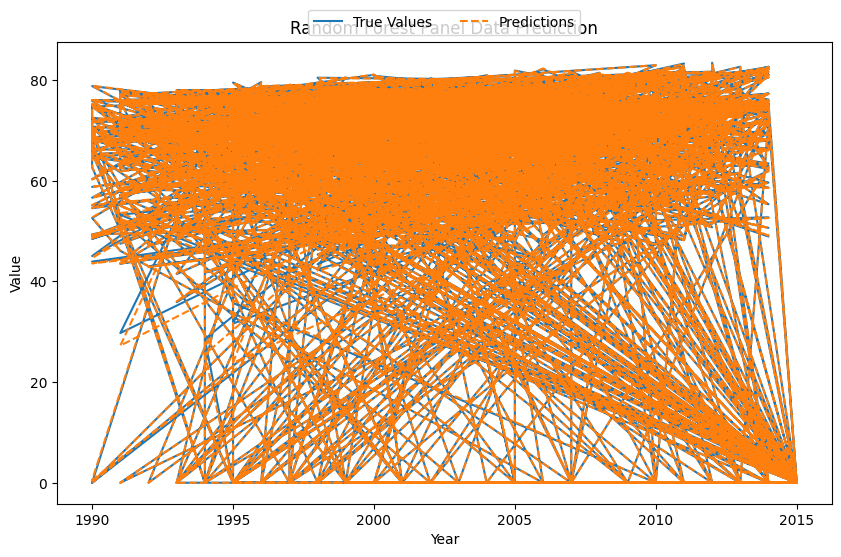

In [192]:
plot_results(df_test_and_predicted_rf, 'Random Forest')

## XGBoost Regressor

In [186]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=3)
for col in X_train.select_dtypes(include=['object']).columns:
    try:
        X_train[col] = pd.to_numeric(X_train[col])
        X_test[col] = pd.to_numeric(X_test[col]) # Apply the same transformation to X_test
    except ValueError:
        print(f"Could not convert column '{col}' to numeric. You might need to handle it differently.")

# Now you can fit the model:
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error: {mse_xgb}')

Mean Squared Error: 0.3135927988610456


In [187]:
# Get feature importances from the trained model
importances_xgb = xgb_model.feature_importances_

# Instead of using 'selected_kpi_list', get the feature names directly from X_train
# This ensures the feature names match the importances array
feature_names = X_train.columns

# Create the DataFrame using the correct feature names
df_feature_importance_xgb = pd.DataFrame({'Feature Code': feature_names, 'Gini Importance': importances_xgb}).sort_values('Gini Importance', ascending=False)
df_feature_importance_xgb['Feature Name'] = df_feature_importance_xgb['Feature Code'].map(kpi_dict)
df_feature_importance_xgb['Model'] = 'XGBoost Regressor'
df_feature_importance_xgb

Feature Code  Gini Importance  \
158  SP.DYN.LE00.FE.IN          0.46273   
157  SP.DYN.LE00.MA.IN          0.41534   
154     SP.DYN.CBRT.IN          0.05282   
155     SP.DYN.CDRT.IN          0.03958   
166     SP.DYN.AMRT.FE          0.02764   
..                 ...              ...   
64   SP.POP.65UP.MA.ZS          0.00000   
69   SP.POP.1564.FE.ZS          0.00000   
70   SP.POP.1564.MA.ZS          0.00000   
71   SP.POP.TOTL.MA.ZS          0.00000   
56   SP.POP.AG11.MA.IN          0.00000   

                                          Feature Name              Model  
158           Life expectancy at birth, female (years)  XGBoost Regressor  
157             Life expectancy at birth, male (years)  XGBoost Regressor  
154               Birth rate, crude (per 1,000 people)  XGBoost Regressor  
155               Death rate, crude (per 1,000 people)  XGBoost Regressor  
166  Mortality rate, adult, female (per 1,000 femal...  XGBoost Regressor  
..                                                 ...                ...  
64     Population ages 65 and above, male (% of total)  XGBoost Regressor  
69          Population ages 15-64, female (% of total)  XGBoost Regressor  
70            Population ages 15-64, male (% of total)  XGBoost Regressor  
71                       Population, male (% of total)  XGBoost Regressor  
56          Age population, age 11, male, interpolated  XGBoost Regressor  

[169 rows x 4 columns]

In [188]:
df_test_and_predicted_xgb, df_actual_vs_predicted_xgb = compare_actual_vs_predicted(X_test, y_test, y_pred_xgb, 'XGBoost Regressor')
df_actual_vs_predicted_xgb

Actual  Predicted              Model
554   0.00000    0.01440  XGBoost Regressor
4982 56.83200   56.69467  XGBoost Regressor
3116 60.05029   59.71821  XGBoost Regressor
1673 78.23171   78.10456  XGBoost Regressor
549   0.00000    0.01440  XGBoost Regressor
...       ...        ...                ...
4778 72.34639   72.27035  XGBoost Regressor
3141 74.28676   74.10772  XGBoost Regressor
362  75.23366   74.95686  XGBoost Regressor
4265 61.93454   61.91116  XGBoost Regressor
4473 70.88293   70.76391  XGBoost Regressor

[1129 rows x 3 columns]

In [189]:
plot_kpi(df_test_and_predicted_xgb, 'Year', 'Actual', hue_col='Country Code')
plot_kpi(df_test_and_predicted_xgb, 'Year', 'Predicted', hue_col='Country Code')

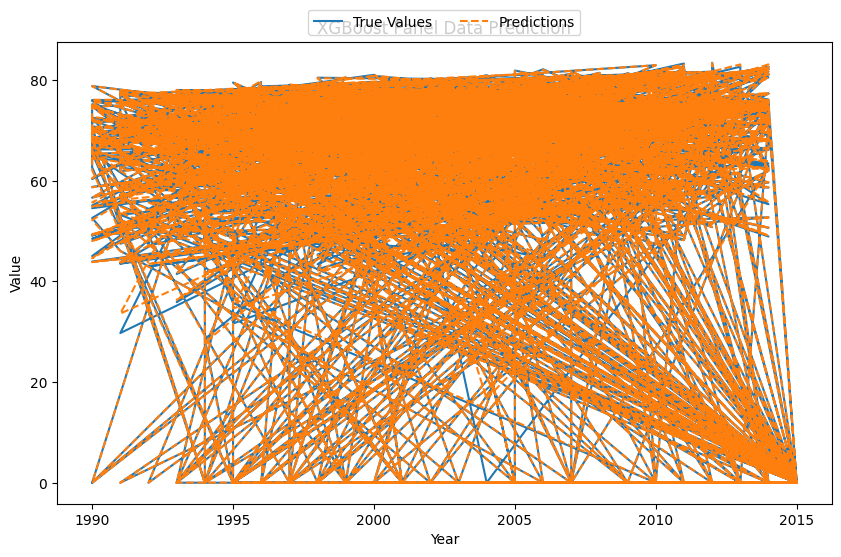

In [194]:
plot_results(df_test_and_predicted_xgb, 'XGBoost')

##LightGBM Regressor

##Catboost Regressor

##SVM Regressor

##Panel Data Regression

# Observations



1.   Dataframe is wide.
2.   Not all year-country-indicator column is populated.
3.   Country Name includes both individual countries and conglomerates. Ex. Arab World.



# Considerations



1.   Consider to shift timeline
2.   Check the KPI column population per country to decide, consider a threshold where for a particular KPI, if x countries have populated data which is above the threshold, consider it.



# Research Questions

Which features affect "Life expectancy at birth, total (years)" across different regions and socio economic conditions ('High income', 'Middle income', 'Low & middle income', 'Lower middle income', 'Low income')?

# Exploratory Data Analysis - Matt

In [ ]:
pd.set_option('display.max_columns', None)
# health_df[health_df['Indicator Name'] == 'Literacy rate, youth total (% of people ages 15-24)'].info()

In [ ]:
income_range_df = health_df[health_df['Country Name'].isin(['High income', 'Low & middle income', ' Lower middle income', 'Low income', 'Middle income'])]
display(income_range_df.shape, income_range_df.head())

In [ ]:
ed_indicators = ['Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)',
                'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
                'Literacy rate, adult female (% of females ages 15 and above)',
                'Literacy rate, adult male (% of males ages 15 and above)',
                'Literacy rate, adult total (% of people ages 15 and above)',
                'Literacy rate, youth male (% of males ages 15-24)',
                'Literacy rate, youth total (% of people ages 15-24)',
                'Primary completion rate, female (% of relevant age group)',
                'Primary completion rate, male (% of relevant age group)',
                'Primary completion rate, total (% of relevant age group)',
                'Public spending on education, total (% of GDP)',
                'Ratio of school attendance of orphans to school attendance of non-orphans ages 10-14',
                'Ratio of young literate females to males (% ages 15-24)',
                'School enrollment, primary (% gross)',
                'School enrollment, primary (% net)',
                'School enrollment, primary, female (% gross)',
                'School enrollment, primary, female (% net)',
                'School enrollment, primary, male (% gross)',
                'School enrollment, primary, male (% net)',
                'School enrollment, secondary (% gross)',
                'School enrollment, secondary (% net)',
                'School enrollment, secondary, female (% gross)',
                'School enrollment, secondary, female (% net)',
                'School enrollment, secondary, male (% gross)',
                'School enrollment, secondary, male (% net)',
                'School enrollment, tertiary (% gross)',
                'School enrollment, tertiary, female (% gross)']

In [ ]:
# set number of rows to display
pd.set_option('display.max_rows', 150)
# drop all columns prior to 1970
columns_to_drop = [str(year) for year in range(1960, 1970)]
# income_range_df = income_range_df.drop(columns=columns_to_drop)
ed_df = income_range_df[income_range_df['Indicator Name'].isin(ed_indicators)].drop(columns=['Country Code', 'Indicator Code'])
ed_df
li_ed_df = ed_df[ed_df['Country Name'] == 'Low income'].drop(columns=['2014', '2015', 'Unnamed: 60'])
li_ed_df

In [ ]:
li_lit_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'Literacy rate, youth female (% of females ages 15-24)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
li_lit_df

In [ ]:
df = li_lit_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates Over Time')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Let's look at formal education

In [ ]:
primary_completion_df = li_ed_df[li_ed_df['Indicator Name'].isin([
    'Primary completion rate, female (% of relevant age group)',
    'Primary completion rate, male (% of relevant age group)',
    'Primary completion rate, total (% of relevant age group)'
])].dropna(axis=1).drop(columns='Country Name').set_index('Indicator Name')
# primary_completion_df

In [ ]:
df = primary_completion_df.transpose()
df.plot(kind='line', figsize=(10, 4))
plt.title('Primary Completion Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Primary Completion Rate (%)')
plt.legend(title='Indicator Name', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
li_gni_df = health_df[health_df['Country Name'] == 'Low income']
li_gni_df = li_gni_df[li_gni_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)']
columns_to_drop = [str(year) for year in range(1960, 1988)]
li_gni_df = li_gni_df.drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60']).drop(columns=columns_to_drop)
li_gni_df.set_index('Indicator Name', inplace=True)
# li_gni_df

In [ ]:
li_gni_df = li_gni_df.transpose()
li_gni_df.plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('GNI per Capita')


In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

In [ ]:
health_indicators = ['Prevalence of anemia among children (% of children under 5)',
       'Prevalence of anemia among non-pregnant women (% of women ages 15-49)',
       'Prevalence of anemia among pregnant women (%)',
       'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
       'Prevalence of HIV, female (% ages 15-24)',
       'Prevalence of HIV, male (% ages 15-24)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of overweight (% of adults)',
       'Prevalence of overweight (% of children under 5)',
       'Prevalence of overweight, female (% of children under 5)',
       'Prevalence of overweight, female (% of female adults)',
       'Prevalence of overweight, male (% of children under 5)',
       'Prevalence of overweight, male (% of male adults)',
       'Prevalence of severe wasting, weight for height (% of children under 5)',
       'Prevalence of severe wasting, weight for height, female (% of children under 5)',
       'Prevalence of severe wasting, weight for height, male (% of children under 5)',
       'Prevalence of syphilis (% of women attending antenatal care)',
       'Prevalence of tuberculosis (per 100,000 population)',
       'Prevalence of undernourishment (% of population)',
       'Prevalence of wasting (% of children under 5)',
       'Prevalence of wasting, female (% of children under 5)',
       'Prevalence of wasting, male (% of children under 5)',
       'Malnutrition prevalence, height for age (% of children under 5)',
       'Malnutrition prevalence, height for age, female (% of children under 5)',
       'Malnutrition prevalence, height for age, male (% of children under 5)',
       'Malnutrition prevalence, weight for age (% of children under 5)',
       'Malnutrition prevalence, weight for age, female (% of children under 5)',
       'Malnutrition prevalence, weight for age, male (% of children under 5)',
       'Maternal leave benefits (% of wages paid in covered period)',
       'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
       'Maternal mortality ratio (national estimate, per 100,000 live births)',
       'Mortality caused by road traffic injury (per 100,000 people)',
       'Mortality rate, adult, female (per 1,000 female adults)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'Mortality rate, infant (per 1,000 live births)',
       'Mortality rate, infant, female (per 1,000 live births)',
       'Mortality rate, infant, male (per 1,000 live births)',
       'Mortality rate, neonatal (per 1,000 live births)',
       'Mortality rate, under-5 (per 1,000)',
       'Mortality rate, under-5, female (per 1,000)',
       'Mortality rate, under-5, male (per 1,000)']

In [ ]:
li_health_df = health_df[health_df['Indicator Name'].isin(health_indicators)][health_df['Country Name'] == 'Low income'].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
li_health_df

In [ ]:
# li_health_df.isna().sum()

In [ ]:
li_adult_mortality_df = li_health_df[li_health_df['Indicator Name'].isin(['Mortality rate, adult, female (per 1,000 female adults)',
                                                                          'Mortality rate, adult, male (per 1,000 male adults)'])]
li_adult_mortality_df



In [ ]:
li_adult_mortality_df = li_adult_mortality_df.set_index('Indicator Name').transpose()



In [ ]:
# rename index to "Year"
li_adult_mortality_df.index.name = 'Year'
li_adult_mortality_df

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 4))
# add more space between plots
plt.subplots_adjust(hspace=0.5)

# plot adult mortality rate
axes[0][0].plot(li_adult_mortality_df.index, li_adult_mortality_df)
axes[0][0].set_title('Adult Mortality Rate by Year')
# only display xticks for every five years
axes[0][0].set_xticks(range(0, len(li_adult_mortality_df.index), 5))
axes[0][0].set_xticklabels(li_adult_mortality_df.index[::5])

# plot primary school completion rate
axes[0][1].plot(primary_completion_df.transpose().index, primary_completion_df.transpose())
axes[0][1].set_title('Primary School Completion Rate by Year')
axes[0][1].set_xticks(range(0, len(primary_completion_df.transpose().index), 5))
axes[0][1].set_xticklabels(primary_completion_df.transpose().index[::5])

# plot GNI per capita by year
axes[1][0].plot(li_gni_df.index, li_gni_df)
axes[1][0].set_title('GNI per Capita by Year')
axes[1][0].set_xticks(range(0, len(li_gni_df.index), 5))
axes[1][0].set_xticklabels(li_gni_df.index[::5])

# plot literacy rates over time
axes[1][1].plot(li_lit_df.transpose().index, li_lit_df.transpose())
axes[1][1].set_title('Literacy Rates by Year')


# Conclusions So Far
My hypothesis was that increasing education levels in low income countries might have a positive effect on life expectancy (or, as seen in the plots above, a decreasing effect on mortality rates). It seems clear, however, that at least in a broad sense, any effects of education are overshadowed by general wealth levels. That is to say, there's a definite correlation between education levels (as measured by primary school completion and literacy rates) and a decrease in adulkt mortality rates. However, GNI per capita seems to correlate even better with mortality rates than the chosen education metrics. (Note the dip and then plateau in GNI matches the brief rise in mortality rate from roughly 1990 to 2000.) This means we can't tell if education itself has anything to do with decreasing adult mortality rates, or if increased education and lower mortality rates are both effects of increasing wealth. Alternatively, it could be the case that education is the root cause of both decreasing mortality and increasing wealth.

As far as predictions go, this is not necessarily a problem. We could build a model to predict mortality rate that takes these factors (and others) into consideration. When it comes to elucidating causes and suggesting interventions, however, we want to know what has the most impact.

# Next Direction to Pursue
## Dig Deeper into the metrics
I suspect that the data I've examined so far will prove fairly representative, but I want to take a look at similar indicators to see if they follow the same patterns. I'll look at education indicators and health indicators in different categories - adult, youth - and in more specific areas, such HIV rates (which may correlate with sexual health education) and malaria incidence.

In [ ]:
reproductive_ed_indicators = [
    '% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
    '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)'
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions',
    'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Condom use with non regular partner, % adults(15-49), female',
    'Condom use with non regular partner, % adults(15-49), male',
    'Condom use, population ages 15-24, female (% of females ages 15-24)',
    'Condom use, population ages 15-24, male (% of males ages 15-24)',
    'Contraceptive prevalence, any methods (% of women ages 15-49)',
    'Contraceptive prevalence, modern methods (% of women ages 15-49)'
    ]
hiv_outcomes = [
    'Children (0-14) living with HIV',
    'Children (ages 0-14) newly infected with HIV',
    'Children orphaned by HIV/AIDS',
    'Prevalence of HIV, female (% ages 15-24)',
    'Prevalence of HIV, male (% ages 15-24)',
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Adults (ages 15+) and children (0-14 years) living with HIV',
    'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
    'Adults (ages 15+) living with HIV',
    'Adults (ages 15+) newly infected with HIV'
    ]

In [ ]:
low_income_df = health_df[health_df['Country Name'] == 'Low income']
reproductive_ed_df = low_income_df[low_income_df['Indicator Name'].isin(reproductive_ed_indicators)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
reproductive_ed_df

In [ ]:
reproductive_ed_df = reproductive_ed_df.dropna(axis=0, thresh=2)

In [ ]:
reproductive_ed_df

In [ ]:
reproductive_ed_df.set_index('Indicator Name').transpose().fillna(method='ffill').plot(kind='line', figsize=(10, 4))
plt.title('Reproductive Health Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

In [ ]:
hiv_df = low_income_df[low_income_df['Indicator Name'].isin(hiv_outcomes)].drop(columns=['Country Code', 'Indicator Code', 'Country Name', 'Unnamed: 60'])
hiv_df

In [ ]:
hiv_df = hiv_df.set_index('Indicator Name').dropna(thresh=5).transpose().fillna(method='ffill')
hiv_df.plot(kind='line', figsize=(10, 4))
plt.title('HIV Outcomes Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')

# Reproductive Health
Here we see that higher contraceptive use, regardless of the specific method, is correlated with lower adolescent birth rates and lower prevalence of HIV over time.

Let's also look at:
* malaria
* spending on education
* education beyond primary
* separate countries that fall into low income level



In [ ]:
health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].describe()

In [ ]:
gni_df = health_df[health_df['Indicator Name'] == 'GNI per capita, Atlas method (current US$)'].drop(columns=['Country Code', 'Indicator Code', 'Indicator Name', 'Unnamed: 60'])
gni_df

In [ ]:
# let's plot gni_df
gni_df.set_index('Country Name').transpose().plot(kind='line', figsize=(10, 4))
plt.title('GNI per Capita Over Time')
# no legend
plt.legend().set_visible(False)

That's not very informative...

# Let's Look at Individual Low-Income Countries
We'll create a threshold, based on an average of each country's GNI per capita over time, and examine the data and trends for all countries under that threshold.

In [ ]:
# let's find average gni for every Country Name in gni_df
gni_df[gni_df['Country Name'] == 'Low income']

In [ ]:
avg_gni = gni_df.bfill(axis=1)
avg_gni = avg_gni.set_index('Country Name')
avg_gni = avg_gni.ffill(axis=1).sort_values(by='Country Name')
avg_gni = avg_gni.ffill(axis=1).dropna()
avg_gni = avg_gni.mean(axis=1)
avg_gni.describe()

In [ ]:
avg_gni

I can use the info above to create my own list of low income countries and see if anything interesting shows up in the numbers for that group that is hidden in the aggregate view where country name = 'Low income'. Let's use the average value for the 'Low income' Country Name as our threshold, but let's bump it up a little bit to include a few more countries.

In [ ]:
avg_gni['Low income']

In [ ]:
threshhold = avg_gni['Low income'] + 150

In [ ]:
# build a custom list of low income countries
low_income_countries = avg_gni[avg_gni < threshhold].index.tolist()
low_income_countries.remove('Least developed countries: UN classification')  # remove the aggregate names
low_income_countries.remove('Low income')
low_income_countries.remove('Heavily indebted poor countries (HIPC)')
low_income_countries

In [ ]:
# filter the main df to include only those countries in the new list
new_df = health_df[health_df['Country Name'].isin(low_income_countries)]
new_df

In [ ]:
# build a df of education indicators for the low income countries
new_ed_df = new_df[new_df['Indicator Name'].isin(ed_indicators)]
# new_ed_df

In [ ]:
# new_ed_df.info()
# there's no non-null data in the columns 1960-1969, or in "unnamed", so let's drop those
new_ed_df = new_ed_df.drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, how='all')
# new_ed_df

In [ ]:
female_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, female (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# female_youth_hiv_ed_df
# 2005, 2006, 2010, 2014

In [ ]:
male_youth_hiv_ed_df = new_ed_df[new_ed_df['Indicator Name'] == 'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)'][['Country Name', '2005', '2006', '2010', '2014']].dropna(thresh=2)
# male_youth_hiv_ed_df

In [ ]:
youth_hiv_ed_df = male_youth_hiv_ed_df.merge(female_youth_hiv_ed_df, how='outer', on="Country Name", suffixes=("_male", "_female"))
youth_hiv_ed_df

In [ ]:
big_hiv_df = new_df[new_df['Indicator Name'].isin(['Prevalence of HIV, female (% ages 15-24)', 'Prevalence of HIV, male (% ages 15-24)'])].dropna(thresh=5).drop(columns=['Country Code', 'Indicator Code']).dropna(axis=1, thresh=5)[['Country Name', '2005', '2006', '2010', '2014']].merge(youth_hiv_ed_df, how='inner', on="Country Name")

In [ ]:
df = new_df[new_df['Indicator Name'] == 'Prevalence of HIV, female (% ages 15-24)'][['Country Name', '2005', '2006', '2010', '2014']].merge(female_youth_hiv_ed_df, how='inner', on="Country Name", suffixes=('_hiv', '_ed')).dropna(axis=1, thresh=3)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
df_melted_hiv = df.melt(id_vars=['Country Name'], value_vars=['2005_hiv', '2006_hiv', '2010_hiv', '2014_hiv'],
                        var_name='Year', value_name='HIV')
df_melted_hiv['Year'] = df_melted_hiv['Year'].str.extract('(\d+)')

df_melted_ed = df.melt(id_vars=['Country Name'], value_vars=['2005_ed', '2006_ed', '2010_ed', '2014_ed'],
                       var_name='Year', value_name='Education')
df_melted_ed['Year'] = df_melted_ed['Year'].str.extract('(\d+)')

# Merge the two melted DataFrames
df_combined = pd.merge(df_melted_hiv, df_melted_ed, on=['Country Name', 'Year'])


In [ ]:
df_combined_cleaned = df_combined.dropna(subset=['HIV', 'Education'])

df_combined_cleaned

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with all countries combined
plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df_combined_cleaned, x="Education", y="HIV", hue="Country Name", palette="tab20", alpha=0.8)
sns.regplot(data=df_combined_cleaned, x="Education", y="HIV", scatter=True)

# Add labels and title
plt.title("Correlation Between Education and HIV Prevalence Across Countries", fontsize=16)
plt.xlabel("HIV Education Level (%)", fontsize=14)
plt.ylabel("HIV Prevalence (%)", fontsize=14)
# plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



In [ ]:
adult_lit = new_df[new_df['Indicator Name'] == 'Literacy rate, adult total (% of people ages 15 and above)']
adult_lit

In [ ]:
ed_indicators